In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
import sklearn.metrics


# Auxilliary settings for plot
color_pal = sns.color_palette('Dark2')
plt.rcParams['text.color'] = '#000'
plt.rcParams['xtick.color'] = '#000'  
plt.rcParams['ytick.color'] = '#000'  
plt.rcParams['axes.labelcolor'] = '#000' 
plt.style.use('fivethirtyeight')

### Linear Regression Analysis

Objective: To predict the NOx concentration based on the cleaned data utilizing different regression algorithms and identify which among those algorithms has the best model performance:

- Linear Regression Analysis
- Lasso Regression Analysis
- Support Vector Machine (SVM)
- Random Forest Classifier

Feature (X) and Target (y) Variable Creation 

In [28]:
# Feature and Target Variables
df = pd.read_csv('data/AirQualityUCI_clean.csv')

# Adjust Datetime column as index
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Datetime',inplace=True)

In [29]:
# Separating feature varibales with our target variable (NOx concentration)
X = df.drop(['NOx(GT)'],axis=1)
y = df['NOx(GT)']

### Model 1: Linear Regression

In [30]:
# Data Train/Test Split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Model Implementation (Linear Regression)
linear=LinearRegression()
linear.fit(X_train, y_train)
accuracy = linear.score(X_test,y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8399384547605799


In [31]:
# Predicting values
y_pred_lm=linear.predict(X_test)
y_pred_lm

array([519.78834558, 321.78157173, 323.18482184, ..., 525.66191817,
       127.31380523, 369.66446712])

In [32]:
# Creating a dataframe combining the actual and predicted NOx concentration
y_pred_lm = pd.Series(y_pred_lm, name='LM: Predicted NOx')

actual_and_pred = pd.concat([y_test.reset_index(drop=True),y_pred_lm],axis=1)
actual_and_pred.rename(columns={'NOx(GT)':'Actual NOx'},inplace=True)
actual_and_pred.set_index(y_test.index,inplace=True)
actual_and_pred

,Actual NOx,LM: Predicted NOx
Datetime,,
2005-01-04 15:00:00,473.0,519.788346
2004-09-10 11:00:00,429.0,321.781572
NaT,265.0,323.184822
2004-08-15 08:00:00,34.0,49.309844
2004-12-15 12:00:00,836.0,558.896974
...,...,...
2004-11-02 15:00:00,674.0,697.557003
2005-02-16 23:00:00,357.0,447.509419
2005-03-08 18:00:00,508.0,525.661918


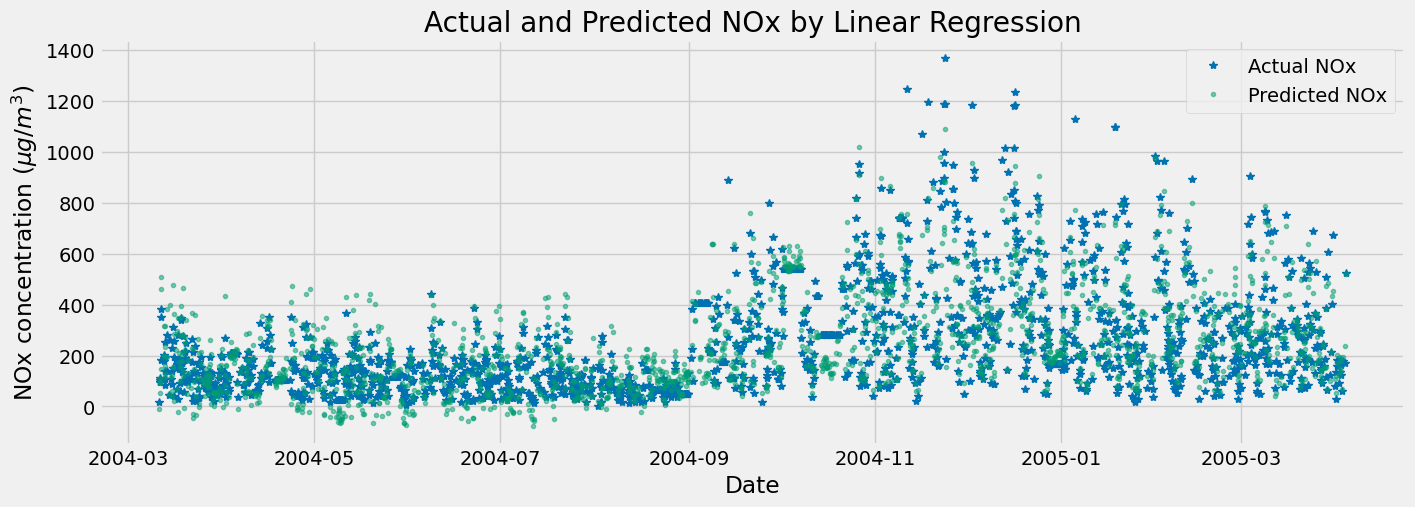

In [33]:
plt.figure(figsize=(15,5))
plt.plot(actual_and_pred.index,actual_and_pred['Actual NOx'],label='Actual NOx',linestyle='',\
    marker='*',color='#0072B2')
plt.plot(actual_and_pred.index,actual_and_pred['LM: Predicted NOx'],label='Predicted NOx',linestyle='',\
    marker='.',color='#009E73',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('NOx concentration ($\mu g/m^3$)')
plt.title('Actual and Predicted NOx by Linear Regression')
plt.legend()
plt.show()

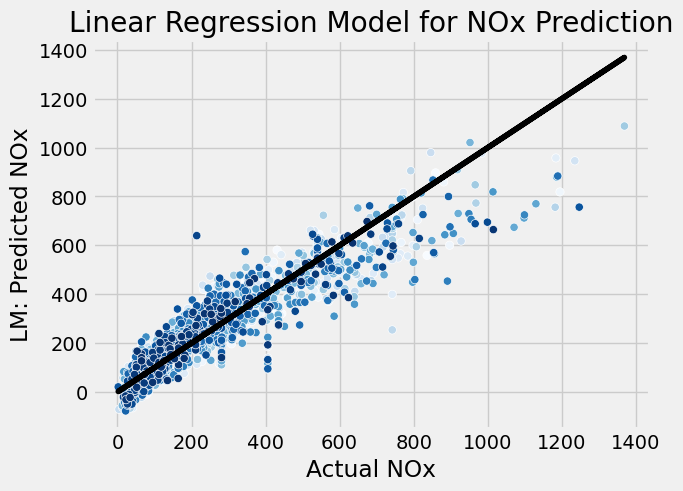

In [34]:
sns.scatterplot(actual_and_pred,x='Actual NOx',y='LM: Predicted NOx',hue=actual_and_pred.index,\
    palette='Blues',legend=False)
plt.plot(actual_and_pred['Actual NOx'],actual_and_pred['Actual NOx'],color='#000', linestyle='-')
plt.title('Linear Regression Model for NOx Prediction')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

linearstat = [round(mean_squared_error(y_test,y_pred_lm),2), \
             round(np.sqrt(mean_squared_error(y_test,y_pred_lm)),2),\
             round(r2_score(y_test,y_pred_lm),2)]

# Model Evaluation: Some metrics to learn about the model
print("Model Intercept:", round(linear.intercept_,2))
print('MSE value  {}'.format(linearstat[0]))
print('RMSE value {}'.format(linearstat[1]))
print('R^2 value {}'.format(linearstat[2]))

Model Intercept: 80.57
MSE value  7527.52
RMSE value 86.76
R^2 value 0.82


### Lasso Regression Analysis

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
#Cross Validation to which parameter is best
param={'alpha':[0.1,1,2,5,10]}
lasso_reg=GridSearchCV(lasso,param,scoring='neg_mean_squared_error',cv=4)
lasso_reg.fit(X,y)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.1}
-13351.366497386083


In [11]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso 

array([275.23924113, 260.27437987, 661.71565847, ..., 551.66462799,
        99.23381477, 143.09095095])

In [12]:
# Creating a dataframe combining the actual and predicted NOx concentration
y_pred_lasso = pd.Series(y_pred_lasso, name='Lasso: Predicted NOx')

actual_and_pred_lasso = pd.concat([y_test.reset_index(drop=True),y_pred_lasso],axis=1)
actual_and_pred_lasso.rename(columns={'NOx(GT)':'Actual NOx'},inplace=True)
actual_and_pred_lasso.set_index(y_test.index,inplace=True)
actual_and_pred_lasso

,Actual NOx,Lasso: Predicted NOx
Datetime,,
2004-11-29 17:00:00,238.0,275.239241
2005-04-01 07:00:00,280.0,260.274380
2005-03-17 09:00:00,745.0,661.715658
2004-06-06 18:00:00,79.0,25.750906
2004-07-23 01:00:00,72.0,137.311302
...,...,...
2004-03-25 14:00:00,106.0,81.278436
2005-01-01 19:00:00,622.0,532.446313
2004-10-07 12:00:00,540.0,551.664628


C:\Users\user\AppData\Local\Temp\ipykernel_6336\516548745.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(actual_and_pred_lasso,x='Actual NOx',y='Lasso: Predicted NOx',\


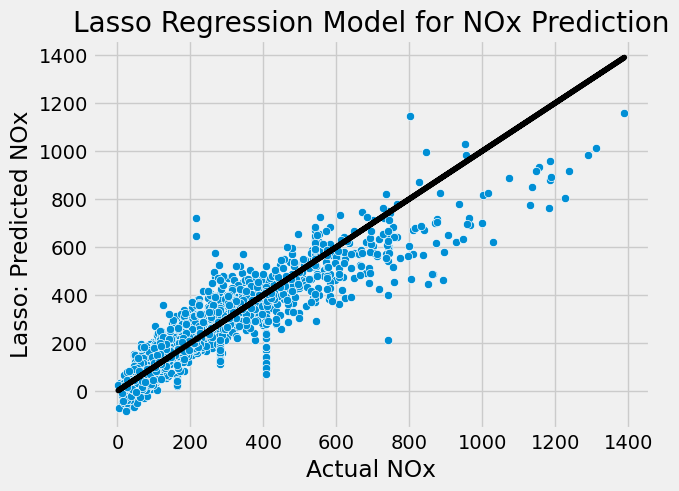

In [20]:
order = np.unique(actual_and_pred_lasso['Actual NOx'])
sns.scatterplot(actual_and_pred_lasso,x='Actual NOx',y='Lasso: Predicted NOx',hue=order,\
    palette='viridis',legend=False)
plt.plot(actual_and_pred_lasso['Actual NOx'],actual_and_pred_lasso['Actual NOx'],color='#000', linestyle='-')
plt.title('Lasso Regression Model for NOx Prediction')
plt.show()

In [18]:
lassostat = [round(mean_squared_error(y_test,y_pred_lasso),2), \
             round(np.sqrt(mean_squared_error(y_test,y_pred_lasso)),2),\
             round(r2_score(y_test,y_pred_lasso),2)]
print('MSE value  {}'.format(lassostat[0]))
print('RMSE value {}'.format(lassostat[1]))
print('R^2 value {}'.format(lassostat[2]))

MSE value  7521.24
RMSE value 86.73
R^2 value 0.82


### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

sv_reg = SVR(kernel='linear',C=100,gamma=0.1)
sv_reg.fit(X_train_sc,y_train)

SVR(C=100, gamma=0.1, kernel='linear')

In [ ]:
X_test_sc = sc.fit_transform(X_test)
y_pred_svr = sv_reg.predict(X_test_sc)
y_pred_svr

array([413.5192542 , 458.81727621, 188.54401986, ..., 296.42256645,
       552.11186906, 133.126136  ])

In [ ]:
# Creating a dataframe combining the actual and predicted NOx concentration
y_pred_svr = pd.Series(y_pred_svr, name='SVR: Predicted NOx')

actual_and_pred_svr = pd.concat([y_test.reset_index(drop=True),y_pred_svr],axis=1)
actual_and_pred_svr.rename(columns={'NOx(GT)':'Actual NOx'},inplace=True)
actual_and_pred_svr.set_index(y_test.index,inplace=True)
actual_and_pred_svr

,Actual NOx,SVR: Predicted NOx
Datetime,,
2004-10-25 12:00:00,565.0,413.519254
2004-12-10 20:00:00,460.0,458.817276
2004-12-02 07:00:00,336.0,188.544020
2004-10-26 23:00:00,169.0,199.301386
2004-06-02 14:00:00,32.0,-11.229198
...,...,...
2004-11-02 14:00:00,726.0,796.480769
2004-11-10 14:00:00,457.0,335.342888
NaT,265.0,296.422566


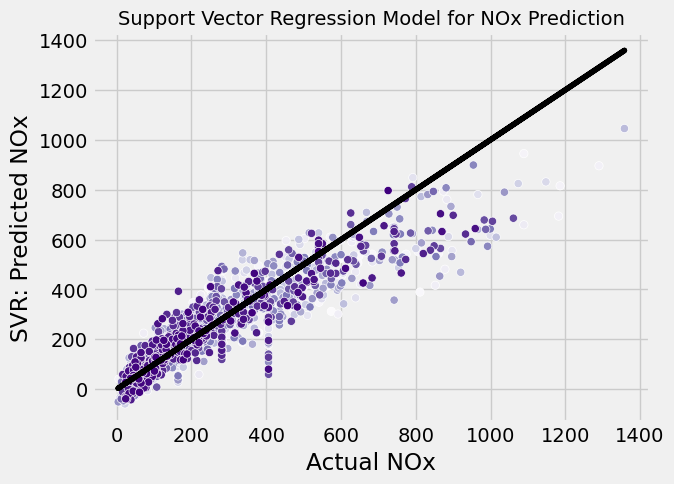

In [ ]:
sns.scatterplot(actual_and_pred_svr,x='Actual NOx',y='SVR: Predicted NOx',hue=actual_and_pred_svr.index,\
    palette='Purples',legend=False)
plt.title('Support Vector Regression Model for NOx Prediction',fontsize=14)
plt.show()

In [ ]:
svrstat = [round(mean_squared_error(y_test,y_pred_svr),2), \
             round(np.sqrt(mean_squared_error(y_test,y_pred_svr)),2),\
             round(r2_score(y_test,y_pred_svr),2)]
print('MSE value  {}'.format(svrstat[0]))
print('RMSE value {}'.format(svrstat[1]))
print('R^2 value {}'.format(svrstat[2]))

MSE value  7756.07
RMSE value 88.07
R^2 value 0.82


### Decision Tree Regression Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(criterion='squared_error')
tree.fit(X_train,y_train)


DecisionTreeRegressor()

In [ ]:
y_pred_tree=tree.predict(X_test)
y_pred_tree

array([445., 341., 282., ..., 265., 540., 147.])

In [ ]:
# Creating a dataframe combining the actual and predicted NOx concentration
y_pred_tree = pd.Series(y_pred_tree, name='Tree: Predicted NOx')

actual_and_pred_tree = pd.concat([y_test.reset_index(drop=True),y_pred_tree],axis=1)
actual_and_pred_tree.rename(columns={'NOx(GT)':'Actual NOx'},inplace=True)
actual_and_pred_tree.set_index(y_test.index,inplace=True)
actual_and_pred_tree

,Actual NOx,Tree: Predicted NOx
Datetime,,
2004-10-25 12:00:00,565.0,445.0
2004-12-10 20:00:00,460.0,341.0
2004-12-02 07:00:00,336.0,282.0
2004-10-26 23:00:00,169.0,169.0
2004-06-02 14:00:00,32.0,17.0
...,...,...
2004-11-02 14:00:00,726.0,826.0
2004-11-10 14:00:00,457.0,389.0
NaT,265.0,265.0


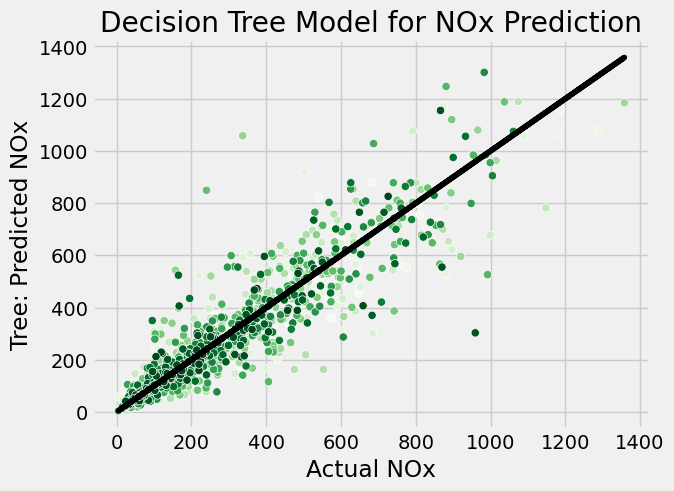

In [ ]:
sns.scatterplot(actual_and_pred_tree,x='Actual NOx',y='Tree: Predicted NOx',hue=actual_and_pred_tree.index,\
    palette='Greens',legend=False)
plt.plot(actual_and_pred_tree['Actual NOx'],actual_and_pred_tree['Actual NOx'],color='#000', linestyle='-')
plt.title('Decision Tree Model for NOx Prediction')
plt.show()

In [ ]:
treestat = [round(mean_squared_error(y_test,y_pred_tree),2), \
             round(np.sqrt(mean_squared_error(y_test,y_pred_tree)),2),\
             round(r2_score(y_test,y_pred_tree),2)]
print('MSE value  {}'.format(treestat[0]))
print('RMSE value {}'.format(treestat[1]))
print('R^2 value {}'.format(treestat[2]))

MSE value  6017.11
RMSE value 77.57
R^2 value 0.86


In [ ]:
# Model Comparison
performance = pd.DataFrame(data=[linearstat,lassostat,svrstat,treestat],\
    index=['Linear Regression','Lasso Regression','Support Vector Regression','Decision Tree'],\
    columns=['MSE','RMSE', 'R^2_score']
    )
performance

,MSE,RMSE,R^2_score
Linear Regression,7172.72,84.69,0.83
Lasso Regression,76691.77,276.93,-0.78
Support Vector Regression,7756.07,88.07,0.82
Decision Tree,6017.11,77.57,0.86


### Model Visualization and Distribution of the Predicted NOx by Model

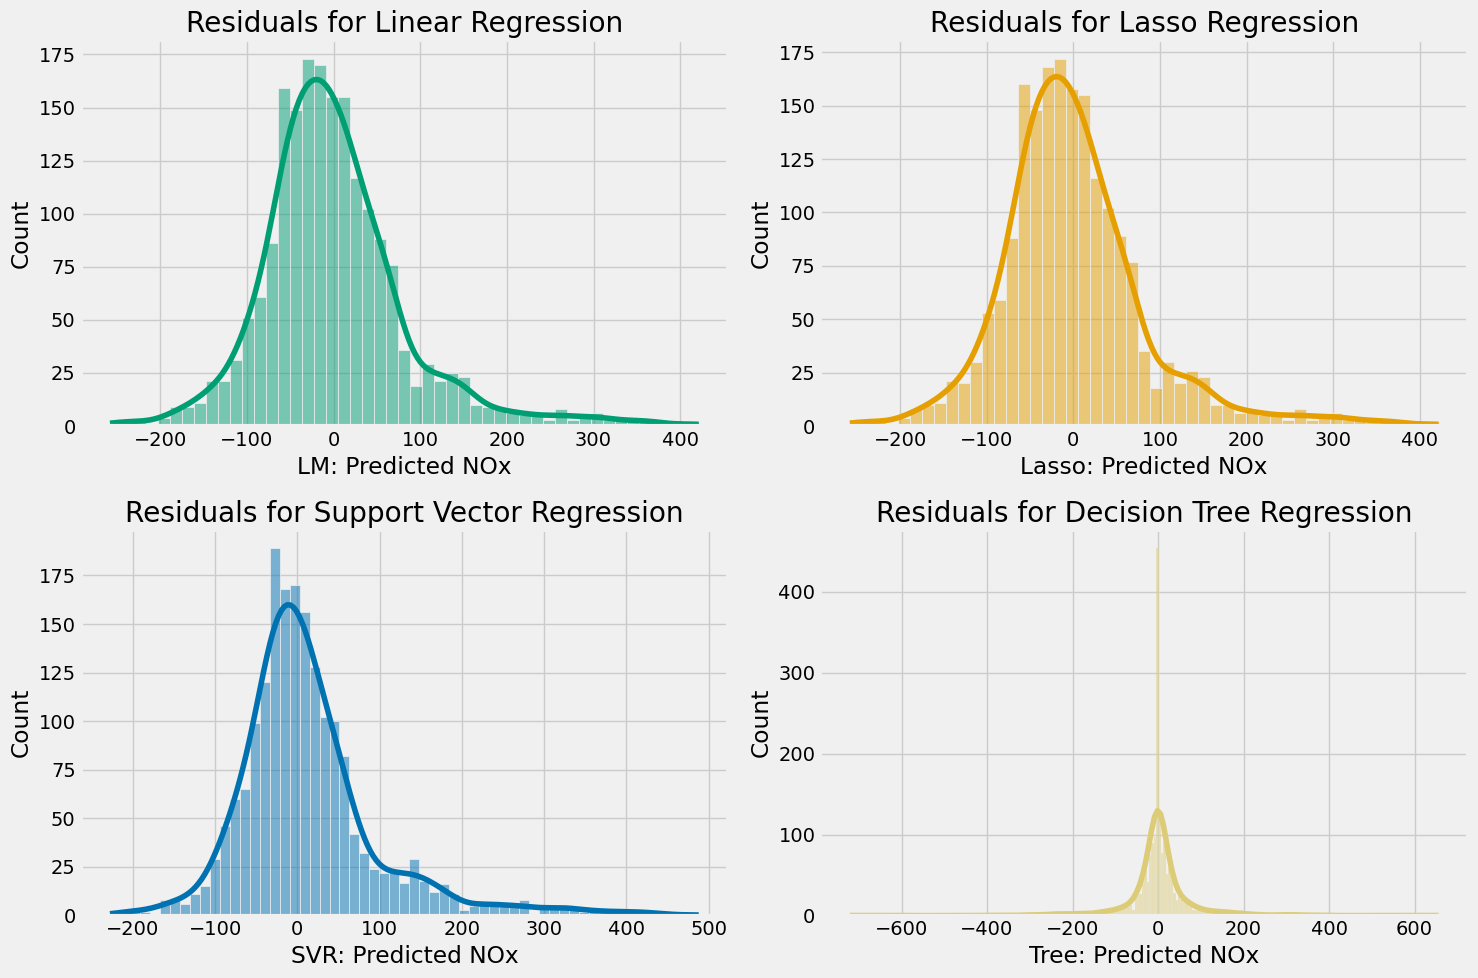

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Linear Regression Residuals
sns.histplot(y_test.values - y_pred_lm, kde=True, color='#009E73', ax=ax[0, 0])
ax[0, 0].set_title('Residuals for Linear Regression')

# Lasso Regression Residuals
sns.histplot(y_test.values - y_pred_lasso, kde=True, color='#E69F00', ax=ax[0, 1])
ax[0, 1].set_title('Residuals for Lasso Regression')

# Support Vector Regression Residuals
sns.histplot(y_test.values - y_pred_svr, kde=True, color='#0072B2', ax=ax[1, 0])
ax[1, 0].set_title('Residuals for Support Vector Regression')

# Decision Tree Regression Residuals
sns.histplot(y_test.values - y_pred_tree, kde=True, color='#DDCC77', ax=ax[1, 1])
ax[1, 1].set_title('Residuals for Decision Tree Regression')

plt.tight_layout()  
plt.show()
